# Disease-associated variants

This analysis aimed to answer the following research questions: 

1. How many of the variants identified within the genes of interest in African populations have known disease phenotype associations?
2. Of the variants with known disease associations, how many are deleterious?
2. Which disease phenotype associations are associated with the deleterious variants that are common or rare in Africans?
3. How do the frequencies of the deleterious variants with known disease phenotype associations compare across African subpopulation groups, and between Africa and other global populations?

To achieve this, the following steps were performed:

1. Variant disease phenotype association and frequency data for both African and global populations were loaded, merged together and stored as a DataFrame object.
2. The number of variants with known disease phenotype associations in African populations was counted, and the percentage of deleterious variants among these was determined.
3. Differences in the frequencies of deleterious variants with known disease phenotype associations were visualised across global populations and African subpopulations using bar plots. 

## Imports

Import relevant libraries and packages

In [1]:
import os
import sys
import warnings

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import numpy as np
import pandas as pd
import seaborn as sns
import upsetplot
from matplotlib import pyplot as plt
import Utils.constants as constants

Turn off warning notifications

In [2]:
# Ignore all warnings
warnings.filterwarnings("ignore")

Set plot parameters

In [3]:
plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

## Data loading

Load processed variant disease phenotype association data from the `Data/Processed/Variant_disease_phenotypes.csv` file. This file includes the following phenotype data in each column:

* `VariantVcf`: Variant call format identifier, representing the variant in the VCF file.
* `Rsid`: Reference SNP ID from the dbSNP database.
* `Clndn`: Clinical significance or disease name associated with the variant.
* `CHROM`: Chromosome number where the variant is located.
* `POS`: Position of the variant on the chromosome.
* `REF`: Reference allele (original allele).
* `ALT`: Alternate allele (mutated allele).
* `ID`: Unique identifier for the variant, often a combination of position, reference allele, and alternate allele.

In [4]:
# Load the data into a DataFrame
phenotype_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Variant_disease_phenotypes.csv",
    )
)

# Remove unnecessary columns
phenotype_data.drop(columns=["VariantVcf", "Rsid", "CHROM", "ID"], inplace=True)

# View the first 5 data entries
phenotype_data.head(5)

,Clndn,POS,REF,ALT
0,NaN,110148917,C,G
1,NaN,110148891,C,G
2,NaN,110149494,C,T
3,NaN,110149715,AAT,A
4,NaN,110151168,C,T


Load the processed African variant count data from the `Data/Processed/IH_allele_counts.csv` file. This file includes the following information:

* `ID`: A unique variant identifier.
* `VAR_NAME`: The non-unique name of the variant.
* `POS`: The nucleotide position at which the genetic variant is located within the genome.
* `ALT` and `REF`: An allele refers to the different forms of a specific variant that can exist at a particular genetic position. For each variant, there are two alleles, the normal form known as the reference allele (REF), and the altered form known as the alternate allele (ALT). These alleles define the genetic variation at a given position.
* `GENE`: The gene in which the variant is located.
* `SUB_POP`: The African ethnolinguistic subpopulation from which the genetic data sample originated.
* `IH_ALT_CTS`: This shows how many times each genetic variant's alternate allele (ALT) appears in all the samples of a population.
* `IH_TOTAL_CTS`: This provides the overall count of all genetic variants' alleles (both REF and ALT) mentioned in the data.
* `IH_REF_CTS`: This shows how many times each genetic variant's reference allele form (REF) appears in all the samples of a population.
* `REG`: The regional classification of the sample's ethnolinguistic group. The possible regions are:
  - Central Africa (CA)
  - Southern Africa (SA)
  - Eastern Africa (EA)
  - Western Africa (WA)
* `IH_AF`: The frequency of the variant's alternate allele in all samples of the population.
* `VARIANT_TYPE`: The type of variant. The possible types are:
    - INDEL
    - SNP

In [5]:
# Load the data into a DataFrame
ih_afr = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "IH_allele_counts.csv",
    )
)

# Remove unnecessary columns
ih_afr.drop(columns=["IH_REF_CTS", "IH_TOTAL_CTS"], inplace=True)

# View the first 5 data entries
ih_afr.head(5)

,ID,VAR_NAME,VARIANT_TYPE,CHROM,POS,REF,ALT,GENE,SUB_POP,REG,IH_ALT_CTS,IH_AF
0,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Bantu Kenya,EA,0,0.0
1,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Yoruba,WA,0,0.0
2,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,San,SA,0,0.0
3,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mende,WA,0,0.0
4,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mbuti Pygmy,CA,0,0.0


Load the processed variant count data from ALFA on European, Asian and Latin American populations from the `Data/Processed/ALFA_allele_counts.csv` file. The file contains the following information:

* `VAR_NAME`: Name or identifier of the genetic variant.
* `REF`: Reference allele (original allele).
* `ALT`: Alternate allele (mutated allele).
* `ALT_CT_ALFA_East Asian`: Count of the alternate allele in the East Asian population (ALFA database).
* `ALT_CT_ALFA_European`: Count of the alternate allele in the European population (ALFA database).
* `ALT_CT_ALFA_Latin American 1`: Count of the alternate allele in the Latin American 1 population (ALFA database).
* `ALT_CT_ALFA_Latin American 2`: Count of the alternate allele in the Latin American 2 population (ALFA database).
* `ALT_CT_ALFA_South Asian`: Count of the alternate allele in the South Asian population (ALFA database).
* `REF_CT_ALFA_East Asian`: Count of the reference allele in the East Asian population (ALFA database).
* `REF_CT_ALFA_European`: Count of the reference allele in the European population (ALFA database).
* `REF_CT_ALFA_Latin American 1`: Count of the reference allele in the Latin American 1 population (ALFA database).
* `REF_CT_ALFA_Latin American 2`: Count of the reference allele in the Latin American 2 population (ALFA database).
* `REF_CT_ALFA_South Asian`: Count of the reference allele in the South Asian population (ALFA database).

In [6]:
# Load the data into a DataFrame
alfa_global = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "ALFA_allele_counts.csv",
    )
)

# View the first 5 data entries
alfa_global.head(5)

,VAR_NAME,REF,ALT,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_Latin American 1,ALT_CT_ALFA_Latin American 2,ALT_CT_ALFA_South Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_South Asian
0,rs1000343,C,T,0.0,49.0,5.0,10.0,0.0,490.0,109377.0,673.0,2200.0,184.0
1,rs1000989,T,C,55.0,21489.0,123.0,1330.0,1685.0,109.0,37269.0,273.0,2052.0,3283.0
2,rs1000990,T,C,32.0,5355.0,40.0,261.0,36.0,54.0,8931.0,106.0,349.0,62.0
3,rs1005573,C,T,35.0,10693.0,209.0,1810.0,79.0,69.0,4955.0,87.0,956.0,31.0
4,rs1007311,A,G,56.0,9154.0,61.0,154.0,43.0,56.0,11242.0,85.0,456.0,55.0


Add information on ALFA allele frequencies 

In [7]:
alfa_global["ALFA_AF_East Asian"] = alfa_global["ALT_CT_ALFA_East Asian"] / (
    alfa_global["ALT_CT_ALFA_East Asian"] + alfa_global["REF_CT_ALFA_East Asian"]
)

alfa_global["ALFA_AF_South Asian"] = alfa_global["ALT_CT_ALFA_South Asian"] / (
    alfa_global["ALT_CT_ALFA_South Asian"] + alfa_global["REF_CT_ALFA_South Asian"]
)

alfa_global["ALFA_AF_European"] = alfa_global["ALT_CT_ALFA_European"] / (
    alfa_global["ALT_CT_ALFA_European"] + alfa_global["REF_CT_ALFA_European"]
)

alfa_global["ALFA_AF_Latin American 1"] = alfa_global[
    "ALT_CT_ALFA_Latin American 1"
] / (
    alfa_global["ALT_CT_ALFA_Latin American 1"]
    + alfa_global["REF_CT_ALFA_Latin American 1"]
)

alfa_global["ALFA_AF_Latin American 2"] = alfa_global[
    "ALT_CT_ALFA_Latin American 2"
] / (
    alfa_global["ALT_CT_ALFA_Latin American 2"]
    + alfa_global["REF_CT_ALFA_Latin American 2"]
)


alfa_global.drop(
    columns=[
        "ALT_CT_ALFA_East Asian",
        "ALT_CT_ALFA_South Asian",
        "ALT_CT_ALFA_European",
        "ALT_CT_ALFA_Latin American 1",
        "ALT_CT_ALFA_Latin American 2",
        "REF_CT_ALFA_East Asian",
        "REF_CT_ALFA_South Asian",
        "REF_CT_ALFA_European",
        "REF_CT_ALFA_Latin American 1",
        "REF_CT_ALFA_Latin American 2",
    ],
    inplace=True,
)

alfa_global.head(5)

,VAR_NAME,REF,ALT,ALFA_AF_East Asian,ALFA_AF_South Asian,ALFA_AF_European,ALFA_AF_Latin American 1,ALFA_AF_Latin American 2
0,rs1000343,C,T,0.000000,0.000000,0.000448,0.007375,0.004525
1,rs1000989,T,C,0.335366,0.339171,0.365720,0.310606,0.393258
2,rs1000990,T,C,0.372093,0.367347,0.374843,0.273973,0.427869
3,rs1005573,C,T,0.336538,0.718182,0.683346,0.706081,0.654375
4,rs1007311,A,G,0.500000,0.438776,0.448813,0.417808,0.252459


Load processed variant effect data from the `Data/Processed/Variant_effects.csv` file. The file contains the following information:

* `CHROM`: Chromosome number where the variant is located.
* `POS`: Genomic position of the variant.
* `REF`: Reference allele (original allele).
* `ALT`: Alternate allele (mutated allele).
* `GENE`: Name of the gene affected by the variant.
* `POLYPHEN_PRED`: PolyPhen prediction category (e.g., benign, possibly damaging).
* `POLYPHEN_SCORE`: PolyPhen score indicating the probability of impact.
* `SIFT_PRED`: SIFT prediction category (e.g., tolerated, deleterious).
* `SIFT_SCORE`: SIFT score indicating the impact on protein function.
* `CADD_RAW_SCORE`: Raw CADD score assessing the variant's potential impact.
* `CADD_PHRED_SCORE`: CADD PHRED score providing a normalized rank of the variant's impact.

In [8]:
# Load the data into a DataFrame
vep_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Variant_effects.csv",
    )
)

# Remove unnecessary columns
vep_data.drop(
    columns=["POLYPHEN_PRED", "POLYPHEN_SCORE", "SIFT_PRED", "SIFT_SCORE"], inplace=True
)

# View the first 5 data entries
vep_data.head(5)

,CHROM,POS,REF,ALT,GENE,CADD_RAW_SCORE,CADD_PHRED_SCORE,ID
0,13,110148882,C,CT,COL4A1,-0.437825,0.160,110148882_C_CT
1,13,110148891,C,G,COL4A1,-0.227221,0.446,110148891_C_G
2,13,110148917,C,G,COL4A1,0.269936,3.938,110148917_C_G
3,13,110148920,G,C,COL4A1,0.530972,6.825,110148920_G_C
4,13,110148959,A,G,COL4A1,1.380228,14.950,110148959_A_G


Import a list of variants with rsIDs that have statistically-significant associations with NESHIE reported in the public domain. This information was retrieved from: https://doi.org/10.1016/j.ygeno.2022.110508.

In [9]:
hie_variant_rsids = constants.HIE_VARIANT_RSIDS
hie_variant_rsids

['rs2067853',
 'rs1217401',
 'rs2043211',
 'rs1001179',
 'rs1800896',
 'rs1071676',
 'rs1143623',
 'rs16944',
 'rs1800795',
 'rs1801133',
 'rs1808593',
 'rs2070744',
 'rs6517135',
 'rs1799964']

## Data Merging


Merge the data from all sources into a single DataFrame to facilitate ease of downstream analysis.

In [10]:
# Start by merging the African allele count and phenotype data
merged_data = ih_afr.merge(
    phenotype_data,
    how="left",
    left_on=["REF", "ALT", "POS"],
    right_on=["REF", "ALT", "POS"],
)

# Split the phenotypes listed in each row of the Clndn column into a list
merged_data["Clndn"] = merged_data["Clndn"].str.split("|")

# Convert the phenotypes list into multiple rows
merged_data = merged_data.explode("Clndn")

# Replace missing values with np.Null
merged_data.replace(
    {
        "not_provided": np.NaN,
        "not_specified": np.NaN,
        "'not_specified": np.NaN,
        "none_provided": np.NaN,
        "not_specified|not_provided": np.NaN,
    },
    inplace=True,
)

# Include the effect prediction data
merged_data = merged_data.merge(
    vep_data, how="left", on=["ID", "CHROM", "POS", "REF", "ALT", "GENE"]
)

# Include the ALFA global allele count data
merged_data = merged_data.merge(alfa_global, how="left", on=["VAR_NAME", "REF", "ALT"])

# Include information on variants with HIE associations
merged_data["NESHIE_ASSOC"] = np.where(
    merged_data["VAR_NAME"].isin(hie_variant_rsids), True, False
)

merged_data.head(5)

,ID,VAR_NAME,VARIANT_TYPE,CHROM,POS,REF,ALT,GENE,SUB_POP,REG,...,IH_AF,Clndn,CADD_RAW_SCORE,CADD_PHRED_SCORE,ALFA_AF_East Asian,ALFA_AF_South Asian,ALFA_AF_European,ALFA_AF_Latin American 1,ALFA_AF_Latin American 2,NESHIE_ASSOC
0,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Bantu Kenya,EA,...,0.0,NaN,-0.437825,0.16,NaN,NaN,NaN,NaN,NaN,False
1,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Yoruba,WA,...,0.0,NaN,-0.437825,0.16,NaN,NaN,NaN,NaN,NaN,False
2,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,San,SA,...,0.0,NaN,-0.437825,0.16,NaN,NaN,NaN,NaN,NaN,False
3,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mende,WA,...,0.0,NaN,-0.437825,0.16,NaN,NaN,NaN,NaN,NaN,False
4,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mbuti Pygmy,CA,...,0.0,NaN,-0.437825,0.16,NaN,NaN,NaN,NaN,NaN,False


## Data selection

Select relevant data for downstream analysis. 

For analyses that will involve comparing data on individual ethnolinguistic subpopulations, select subpopulation data. Remove variants with an alternate allele count of 0, as these variants are not present in the subpopulation of interest.

In [11]:
merged_data_sub = ih_afr[(ih_afr.REG != "Recent African")]

For analyses that will utilise aggregated data on Recent Africans as a whole, select Recent African data. Remove variants with an alternate allele count of 0, as these variants are not present in Recent Africans.

In [12]:
merged_data_ra = merged_data[
    (merged_data["REG"] == "Recent African") & (merged_data["IH_ALT_CTS"] > 0)
]

## Analysis and Visualisation

### How many variants have known disease associations and are present in Africans?

In [13]:
# Variants with HIE associations
variants_hie_phenotypes = merged_data_ra[merged_data_ra.NESHIE_ASSOC == True]
print(
    f"Number of HIE-associated variants in Africans: {variants_hie_phenotypes.VAR_NAME.nunique()}"
)

# Variants with ClinVar phenotypes
variants_clinvar_phenotypes = merged_data_ra[merged_data_ra["Clndn"].notnull()]
print(
    f"Variants with known ClinVar phenotypes: {variants_clinvar_phenotypes.ID.nunique()}"
)

# Variants with both known Clinvar phenotypes and HIE associations
variants_clinvar_hie_phenotypes = merged_data_ra[
    (merged_data_ra.NESHIE_ASSOC == True) & (merged_data_ra["Clndn"].notnull())
]
print(
    f"Variants with known ClinVar phenotypes and HIE associations: {variants_clinvar_hie_phenotypes.ID.nunique()}"
)

Number of HIE-associated variants in Africans: 9
Variants with known ClinVar phenotypes: 133
Variants with known ClinVar phenotypes and HIE associations: 5


### How many of the variants with known disease associations have predicted deleteriousness (CADD>=10)?

In [15]:
# Select variants with both a known Clinvar phenotype or a NESHIE association
variants_all_phenotypes = merged_data_ra[(merged_data_ra.NESHIE_ASSOC == True) | (merged_data_ra['Clndn'].notnull())]

# Filter for variants with cadd >=10
variants_all_phenotypes_deleterious = variants_all_phenotypes[variants_all_phenotypes.CADD_PHRED_SCORE >= 10]

# Of these variants with known phenotypes and cadd >=10, which have been associated with NESHIE? 
hie_variants_all_phenotypes_deleterious = variants_all_phenotypes_deleterious[variants_all_phenotypes_deleterious.NESHIE_ASSOC == True].VAR_NAME.unique()

print(f'Variants with associated disease associations and a CADD score >= 10: {variants_all_phenotypes_deleterious.ID.nunique()}')
print(f'Percentage of variants associated disease associations and a CADD score >=10: {variants_all_phenotypes_deleterious.ID.nunique()/variants_all_phenotypes.ID.nunique()*100}%')
print(f'HIE associated variants with CADD scores >=10: {hie_variants_all_phenotypes_deleterious}')

Variants with associated disease associations and a CADD score >= 10: 41
Percentage of variants associated disease associations and a CADD score >=10: 29.927007299270077%
HIE associated variants with CADD scores >=10: ['rs1217401' 'rs1801133' 'rs1800795']


### What are the known phenotypes of the deleterious variants with common frequencies (>=0.1)?

In [16]:
# Count the number of variants with known phenotypes, CADD >=10 and that are common
common_variants_all_phenotypes_deleterious = variants_all_phenotypes_deleterious[
    variants_all_phenotypes_deleterious.IH_AF >= 0.1
].sort_values(by=["GENE", "Clndn", "ID"], ascending=True)
print(
    f"Common variants with known phenotypes and cadd >= 10: {common_variants_all_phenotypes_deleterious.ID.nunique()}"
)

# Display common variants, and their associated clinical disease phenotype
print("\nPhenotypes associated with common variants with cadd >= 10:")
common_variants_all_phenotypes_deleterious[
    ["GENE", "Clndn", "ID", "VAR_NAME", "REF", "ALT", "IH_AF", "CADD_PHRED_SCORE"]
]

Common variants with known phenotypes and cadd >= 10: 10

Phenotypes associated with common variants with cadd >= 10:


,GENE,Clndn,ID,VAR_NAME,REF,ALT,IH_AF,CADD_PHRED_SCORE
123142,AP4B1,History_of_neurodevelopmental_disorder,113896329_A_G,rs1217401,A,G,0.797541,21.90
123141,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",113896329_A_G,rs1217401,A,G,0.797541,21.90
123143,AP4B1,NaN,113896329_A_G,rs1217401,A,G,0.797541,21.90
584,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",110149776_G_T,rs13260,G,T,0.266393,11.67
40336,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",110205548_A_G,rs677877,A,G,0.388060,10.31
118388,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",110307009_C_G,rs9515185,C,G,0.216172,13.89
118454,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",110307117_C_A,rs113651836,C,A,0.107084,14.63
583,COL4A1,Brain_small_vessel_disease_1_with_or_without_o...,110149776_G_T,rs13260,G,T,0.266393,11.67
40335,COL4A1,Brain_small_vessel_disease_1_with_or_without_o...,110205548_A_G,rs677877,A,G,0.388060,10.31
118387,COL4A1,Brain_small_vessel_disease_1_with_or_without_o...,110307009_C_G,rs9515185,C,G,0.216172,13.89


### What are the known phenotypes of the deleterious variants with rare frequencies (<0.01)?

In [17]:
# Count the number of variants with known phenotypes, CADD >=10 and that are common
rare_variants_all_phenotypes_deleterious = variants_all_phenotypes_deleterious[
    variants_all_phenotypes_deleterious.IH_AF < 0.01
].sort_values(by=["GENE", "Clndn", "ID"], ascending=True)
print(
    f"Rare variants with known phenotypes and cadd >= 10: {rare_variants_all_phenotypes_deleterious.ID.nunique()}"
)

# Display common variants, and their associated clinical disease phenotype
print("\nPhenotypes associated with common variants with cadd >= 10:")
rare_variants_all_phenotypes_deleterious[
    ["GENE", "Clndn", "ID", "VAR_NAME", "REF", "ALT", "IH_AF", "CADD_PHRED_SCORE"]
]

Rare variants with known phenotypes and cadd >= 10: 23

Phenotypes associated with common variants with cadd >= 10:


,GENE,Clndn,ID,VAR_NAME,REF,ALT,IH_AF,CADD_PHRED_SCORE
170688,AGT,Renal_dysplasia,230703157_G_A,rs143479528,G,A,0.004098,24.50
170772,AGT,Renal_dysplasia,230703274_G_A,rs61751077,G,A,0.005738,23.50
171566,AGT,Renal_dysplasia,230704308_A_G,rs61731499,A,G,0.006557,11.45
173039,AGT,Renal_dysplasia,230706171_C_T,rs139685563,C,T,0.001639,22.90
124190,AP4B1,History_of_neurodevelopmental_disorder,113897925_C_T,rs145803736,C,T,0.000820,25.90
125197,AP4B1,History_of_neurodevelopmental_disorder,113900051_A_T,rs149335605,A,T,0.000820,22.00
125307,AP4B1,History_of_neurodevelopmental_disorder,113900120_C_A,rs111785152,C,A,0.008197,20.70
122724,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",113895442_A_C,rs148748734,A,C,0.001639,12.93
125196,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",113900051_A_T,rs149335605,A,T,0.000820,22.00
125306,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",113900120_C_A,rs111785152,C,A,0.008197,20.70


### How do the frequencies of the common, deleterious variants with known phenotypes compare to that of other global populations?

Generate a barplot visualising the global frequency differences of common variants with known phenotypes and deleterious CADD scores 

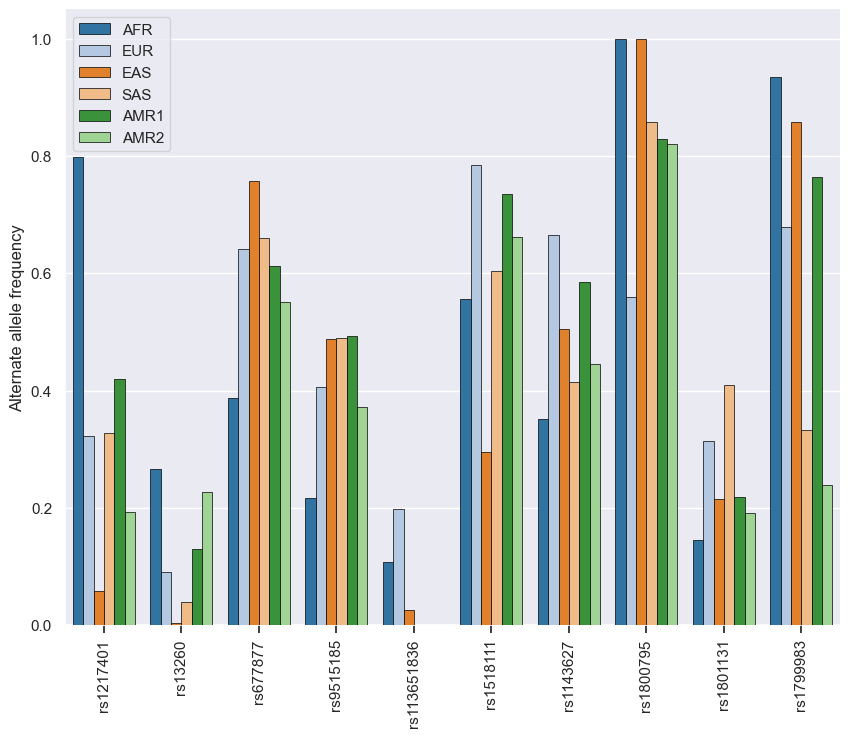

In [18]:
# Unpivot relevant columns to prepare data for plotting
common_variants_with_known_phenotype_plot = (
    common_variants_all_phenotypes_deleterious.melt(
        id_vars=["VAR_NAME"],
        value_vars=[
            "IH_AF",
            "ALFA_AF_European",
            "ALFA_AF_East Asian",
            "ALFA_AF_South Asian",
            "ALFA_AF_Latin American 1",
            "ALFA_AF_Latin American 2",
        ],
        var_name="POP",
        value_name="AF",
    ).replace(
        {
            "IH_AF": "AFR",
            "ALFA_AF_European": "EUR",
            "ALFA_AF_East Asian": "EAS",
            "ALFA_AF_South Asian": "SAS",
            "ALFA_AF_Latin American 1": "AMR1",
            "ALFA_AF_Latin American 2": "AMR2",
        }
    )
)

# Set plot figure size
sns.set(rc={"figure.figsize": (10, 8)})

# Set plot color palette
palette = sns.set_palette("tab20", 6)

# Generate a bar plot with variant name on x-axis and allele frequency on y-axis for each population group
phenotype_variants_barplot = sns.barplot(
    data=common_variants_with_known_phenotype_plot,
    x="VAR_NAME",
    y="AF",
    hue="POP",
    edgecolor="black",
    linewidth=0.5,
    zorder=100,
)

# Despine axes
sns.despine()

# Set tick parameters
plt.tick_params(bottom="on")
plt.xticks(rotation=90)

# Set labels
plt.xlabel(xlabel=None)
plt.ylabel(ylabel="Alternate allele frequency")
plt.legend(title=None)

# Save figure
plt.savefig(
    "..\Results\Figures\Common_disease_causing_global_freq.png",
    dpi=1200,
    bbox_inches="tight",
)

plt.show()

### How do the frequencies of the common, deleterious variants with known phenotypes compare between African ethnolinguistic groups?

Generate a barplot visualising the African ethnolinguistic group frequency differences of common variants with known phenotypes and deleterious CADD scores 

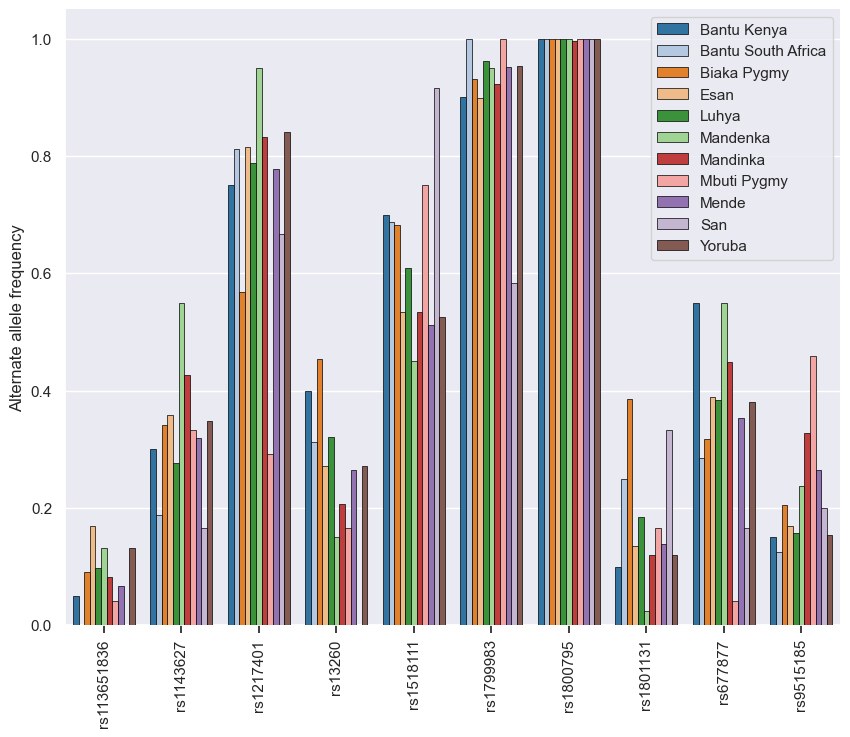

In [19]:
# Get a list of common variants to get individual ethnolinguistic group frequencies for.
common_deleterious_variants_with_known_phenotype_list = list(
    common_variants_all_phenotypes_deleterious.ID.unique()
)

# Extract ethnolinguistic population frequencies for each of these variants.
ih_afr_subpops_common_deleterious_variants = merged_data_sub[
    merged_data_sub.ID.isin(common_deleterious_variants_with_known_phenotype_list)
]

# Filter out irrelevant data and prepare for plotting.
ih_afr_subpops_common_deleterious_variants_filtered = (
    ih_afr_subpops_common_deleterious_variants.drop(
        columns=["POS", "REF", "ALT", "IH_ALT_CTS", "VARIANT_TYPE", "REG"]
    )
)
ih_afr_subpops_common_deleterious_variants_filtered = (
    ih_afr_subpops_common_deleterious_variants_filtered.pivot(
        index=["VAR_NAME"], columns=["SUB_POP"], values=["IH_AF"]
    ).reset_index()
)
ih_afr_subpops_common_deleterious_variants_filtered.columns = (
    ih_afr_subpops_common_deleterious_variants_filtered.columns.get_level_values(1)
)
ih_afr_subpops_common_deleterious_variants_filtered = (
    ih_afr_subpops_common_deleterious_variants_filtered.rename(columns={"": "VAR_NAME"})
)
ih_afr_subpops_common_deleterious_variants_filtered = (
    ih_afr_subpops_common_deleterious_variants_filtered.melt(
        id_vars=["VAR_NAME"],
        value_vars=ih_afr_subpops_common_deleterious_variants_filtered.iloc[
            :, 1:
        ].columns,
        var_name="POP",
        value_name="AF",
    )
)

# Set plot figure size


sns.set(rc={"figure.figsize": (10, 8)})

# Set plot color palette


palette = sns.set_palette("tab20", 11)



# Generate a bar plot with variant name on x-axis and allele frequency on y-axis for each population group


phenotype_variants_barplot = sns.barplot(
    data=ih_afr_subpops_common_deleterious_variants_filtered,

    x="VAR_NAME",
    y="AF",
    # marker="o",
    hue="POP",
    edgecolor="black",
    # jitter=0.18,
    linewidth=0.5,
    zorder=100,
)



# Despine axes
sns.despine()



# Set tick parameters


plt.tick_params(bottom="on")


plt.xticks(rotation=90)



# Set labels


plt.xlabel(xlabel=None)


plt.ylabel(ylabel="Alternate allele frequency")


plt.legend(title=None)



# Save figure


plt.savefig(
    "..\Results\Figures\Common_disease_causing_subpop_freq.png",
    dpi=1200,
    bbox_inches="tight",
)


plt.show()

### How do the frequencies of the rare, deleterious variants with known phenotypes compare to that of other global populations?

Generate a barplot visualising the global frequency differences of rare variants with known phenotypes and deleterious CADD scores.

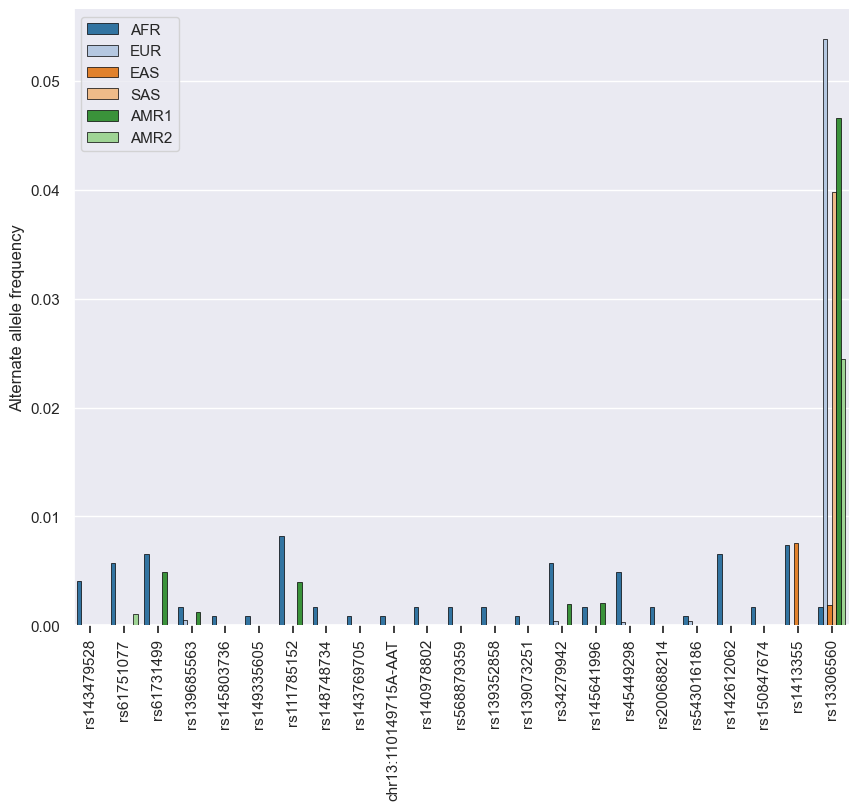

In [20]:
# Unpivot relevant columns to prepare data for plotting
rare_variants_with_known_phenotype_plot = rare_variants_all_phenotypes_deleterious.melt(
    id_vars=["VAR_NAME"],
    value_vars=[
        "IH_AF",
        "ALFA_AF_European",
        "ALFA_AF_East Asian",
        "ALFA_AF_South Asian",
        "ALFA_AF_Latin American 1",
        "ALFA_AF_Latin American 2",
    ],
    var_name="POP",
    value_name="AF",
).replace(
    {
        "IH_AF": "AFR",
        "ALFA_AF_European": "EUR",
        "ALFA_AF_East Asian": "EAS",
        "ALFA_AF_South Asian": "SAS",
        "ALFA_AF_Latin American 1": "AMR1",
        "ALFA_AF_Latin American 2": "AMR2",
    }
)

# Set plot figure size
sns.set(rc={"figure.figsize": (10, 8)})

# Set plot color palette
palette = sns.set_palette("tab20", 6)

# Generate bar plot with variant name on x-axis and allele frequency on y-axis for each population group
phenotype_variants_barplot = sns.barplot(
    data=rare_variants_with_known_phenotype_plot,
    x="VAR_NAME",
    y="AF",
    # marker="o",
    hue="POP",
    edgecolor="black",
    # jitter=0.18,
    linewidth=0.5,
    zorder=100,
)

# Despine axes
sns.despine()

# Set tick parameters
plt.tick_params(bottom="on")
plt.xticks(rotation=90)

# Set labels
plt.xlabel(xlabel=None)
plt.ylabel(ylabel="Alternate allele frequency")
plt.legend(title=None)

# Save figure
plt.savefig(
    "..\Results\Figures\Rare_disease_causing_global_freq.png",
    dpi=1200,
    bbox_inches="tight",
)
plt.show()

### How do the frequencies of the rare, deleterious variants with known phenotypes compare between African ethnolinguistic groups?

Generate a barplot visualising the African ethnolinguistic group frequency differences of rare variants with known phenotypes and deleterious CADD scores 

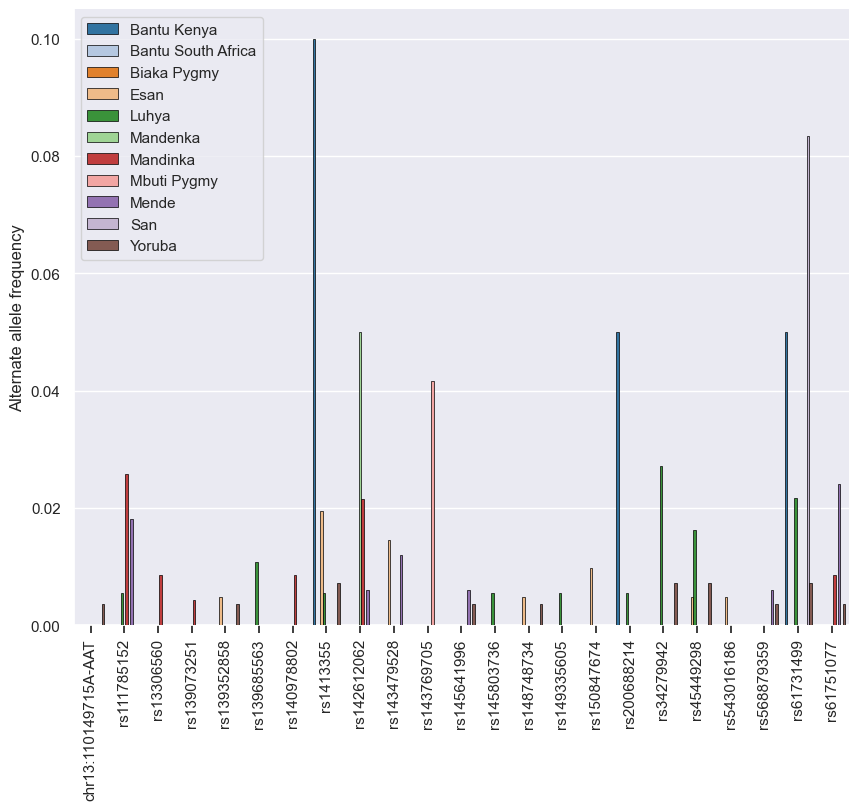

In [21]:
# Get a list of rare variants to get individual ethnolinguistic group frequencies for.
rare_variants_all_phenotypes_deleterious_list = list(
    rare_variants_all_phenotypes_deleterious.ID.unique()
)

# Extract ethnolinguistic population frequencies for each of these variants.
ih_afr_subpops_rare_deleterious_variants = merged_data_sub[
    merged_data_sub.ID.isin(rare_variants_all_phenotypes_deleterious_list)
]

# Filter out irrelevant data and prepare for plotting.
ih_afr_subpops_rare_deleterious_variants_filtered = (
    ih_afr_subpops_rare_deleterious_variants.drop(
        columns=["POS", "REF", "ALT", "IH_ALT_CTS", "VARIANT_TYPE", "REG"]
    )
)
ih_afr_subpops_rare_deleterious_variants_filtered = (
    ih_afr_subpops_rare_deleterious_variants_filtered.pivot(
        index=["VAR_NAME"], columns=["SUB_POP"], values=["IH_AF"]
    ).reset_index()
)
ih_afr_subpops_rare_deleterious_variants_filtered.columns = (
    ih_afr_subpops_rare_deleterious_variants_filtered.columns.get_level_values(1)
)
ih_afr_subpops_rare_deleterious_variants_filtered = (
    ih_afr_subpops_rare_deleterious_variants_filtered.rename(columns={"": "VAR_NAME"})
)
ih_afr_subpops_rare_deleterious_variants_filtered = (
    ih_afr_subpops_rare_deleterious_variants_filtered.melt(
        id_vars=["VAR_NAME"],
        value_vars=ih_afr_subpops_rare_deleterious_variants_filtered.iloc[
            :, 1:
        ].columns,
        var_name="POP",
        value_name="AF",
    )
)

# Set plot figure size


sns.set(rc={"figure.figsize": (10, 8)})



# Set plot color palette


palette = sns.set_palette("tab20", 11)



# Generate scatterplot with variant name on x-axis and allele frequency on y-axis for each population group


phenotype_variants_barplot = sns.barplot(
    data=ih_afr_subpops_rare_deleterious_variants_filtered,

    x="VAR_NAME",
    y="AF",
    # marker="o",
    hue="POP",
    edgecolor="black",
    # jitter=0.18,
    linewidth=0.5,
    zorder=100,
)



# Despine axes
sns.despine()



# Set tick parameters


plt.tick_params(bottom="on")


plt.xticks(rotation=90)



# Set labels


plt.xlabel(xlabel=None)


plt.ylabel(ylabel="Alternate allele frequency")


plt.legend(title=None)



# Save figure


plt.savefig(
    "..\Results\Figures\Rare_disease_causing_subpop_freq.png",
    dpi=1200,
    bbox_inches="tight",
)


plt.show()